# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#dowload symple python library and weather API pull: to have the place to download info
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [5]:
#print city count to review all is ok
cities_data=pd.DataFrame({"City":cities})
cities_data.head()

#fun fact: Te Anau is the largest of the southern glacial lakes in New Zealand. 

,City
0,te anau
1,hithadhoo
2,olafsvik
3,mataura
4,jamestown


In [18]:
cities_Test = cities[0:500]
cities_Test

['te anau',
 'hithadhoo',
 'olafsvik',
 'mataura',
 'jamestown',
 'rikitea',
 'dikson',
 'hasaki',
 'bathsheba',
 'lasa',
 'salalah',
 'sola',
 'formoso do araguaia',
 'humaita',
 'guerrero negro',
 'waingapu',
 'taolanaro',
 'muravlenko',
 'aflu',
 'atuona',
 'longyearbyen',
 'kapaa',
 'kodiak',
 'port hedland',
 'barentsburg',
 'meyungs',
 'port alfred',
 'tasiilaq',
 'georgetown',
 'vila velha',
 'rapar',
 'hilo',
 'souillac',
 'ushuaia',
 'srikakulam',
 'albany',
 'puerto ayora',
 'bengkulu',
 'vostok',
 'barawe',
 'paamiut',
 'fairbanks',
 'norman wells',
 'bure',
 'alotau',
 'wau',
 'vaini',
 'ilulissat',
 'vestmanna',
 'geraldton',
 'kuva',
 'san ramon',
 'eseka',
 'qaanaaq',
 'bethel',
 'bluff',
 'kysyl-syr',
 'vilhena',
 'nemuro',
 'brownsville',
 'celestun',
 'new norfolk',
 'klaksvik',
 'ribeira grande',
 'okhotsk',
 'coquimbo',
 'padang',
 'bacolod',
 'hervey bay',
 'kaitangata',
 'grand river south east',
 'busselton',
 'tuatapere',
 'cervo',
 'ust-barguzin',
 'dubinino',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
resultsDataFrame

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [26]:
resultsDataFrame = pd.DataFrame({
    "City":[],
    "Cloudiness": [],
    "Country":[],
    "Date":[],
    "Humidity":[],
    "Lat":[],
    "Lng":[],
    "Max Temp":[],
    "Wind Speed":[]
})
base_url = 'http://api.openweathermap.org/data/2.5/weather'
index = 1;
for city in cities_Test:    
    params = {
        'q': city,
        'APPID': '07e18beff7ff5defb0974641c5c54d88'
    }    
    try:    
        response = requests.get(base_url, params=params)
        result = response.json()
        print(f"Retrieving Results from {response.url}")
        print(f"Retrieving Results for city: {response.status_code} {city}.")

        resultsDataFrame.loc[index] = [
            city,
            result["clouds"]["all"],
            result["sys"]["country"],
            result["dt"],
            result["main"]["humidity"],
            result["coord"]["lat"],
            result["coord"]["lon"],
            result["main"]["temp_max"],
            result["wind"]["speed"],
        ]
        index += 1
    except:
        print("City nof found. Skipping...")
        

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=te+anau&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 te anau.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 hithadhoo.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=olafsvik&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 404 olafsvik.
City nof found. Skipping...
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=mataura&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 mataura.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=jamestown&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 jamestown.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=rikitea&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=kuva&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 404 kuva.
City nof found. Skipping...
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=san+ramon&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 san ramon.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=eseka&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 eseka.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 qaanaaq.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=bethel&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 bethel.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=bluff&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 bluff.
Retrieving R

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 bredasdorp.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=pak+phanang&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 pak phanang.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=port+elizabeth&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 port elizabeth.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=ca+mau&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 ca mau.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=saskylakh&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 saskylakh.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=una&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 una.
Retrie

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=avera&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 avera.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 tuktoyaktuk.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=dawlatabad&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 dawlatabad.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=codrington&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 codrington.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=hamilton&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 hamilton.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=klyuchi&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 klyuchi.
Retrieving

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=southbridge&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 southbridge.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=teya&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 teya.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=alyangula&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 alyangula.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=saldanha&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 saldanha.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=tagusao&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 tagusao.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=carballo&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 carballo.
Retrieving Results

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=portland&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 portland.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=kavaratti&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 kavaratti.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=pampas&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 pampas.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=toora-khem&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 toora-khem.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=quepos&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 quepos.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=arraial+do+cabo&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 arraial do cabo.
Retr

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=malyye+derbety&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 malyye derbety.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=airai&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 airai.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=cherskiy&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 cherskiy.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=ponta+do+sol&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 ponta do sol.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=camapua&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 camapua.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=pacific+grove&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 pacific g

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=mwense&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 mwense.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=koumac&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 koumac.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=itaueira&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 itaueira.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=ust-kut&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 ust-kut.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=alta+floresta&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 alta floresta.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=killybegs&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 killybegs.
Retrieving Res

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=ulladulla&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 ulladulla.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=guiratinga&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 guiratinga.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=vicar&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 vicar.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=cockburn+town&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 cockburn town.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=cairns&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 cairns.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=machilipatnam&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 machilipatnam.


Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=chengam&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 chengam.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=biloela&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 biloela.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=tabukiniberu&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 404 tabukiniberu.
City nof found. Skipping...
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=zemio&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 zemio.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=vanavara&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 vanavara.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=tilichiki&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200

Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=gornyy&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 gornyy.
Retrieving Results from http://api.openweathermap.org/data/2.5/weather?q=amet&APPID=07e18beff7ff5defb0974641c5c54d88
Retrieving Results for city: 200 amet.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
#Describe the data
resultsDataFrame.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,442.000000,4.420000e+02,442.000000,442.000000,442.000000,442.000000,442.000000
mean,39.131222,1.554170e+09,73.762443,19.202692,18.672443,287.003733,3.459163
std,35.594860,1.539957e+03,21.891821,34.531422,90.096017,11.799360,2.449400
min,0.000000,1.554166e+09,6.000000,-54.810000,-173.230000,251.560000,0.420000
25%,0.000000,1.554170e+09,59.000000,-10.322500,-58.127500,277.067500,1.620000
50%,32.000000,1.554171e+09,80.000000,21.255000,18.410000,288.360000,2.995000
75%,75.000000,1.554171e+09,92.000000,47.877500,99.805000,297.947500,4.600000
max,100.000000,1.554171e+09,100.000000,78.220000,179.320000,309.660000,21.220000


In [30]:
#DF size
resultsDataFrame.size

3978

In [34]:
resultsDataFrame.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,te anau,80.0,NZ,1.554171e+09,66.0,-45.41,167.72,283.36,1.57
2,hithadhoo,64.0,MV,1.554171e+09,100.0,-0.60,73.08,301.11,3.77
3,mataura,92.0,NZ,1.554171e+09,72.0,-46.19,168.86,286.48,3.13
4,jamestown,0.0,AU,1.554171e+09,57.0,-33.21,138.60,294.81,2.27
5,rikitea,0.0,PF,1.554171e+09,100.0,-23.12,-134.97,297.66,7.47


In [33]:
resultsDataFrame.count()

City          442
Cloudiness    442
Country       442
Date          442
Humidity      442
Lat           442
Lng           442
Max Temp      442
Wind Speed    442
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

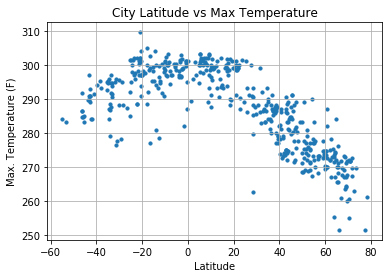

In [37]:
#Latitute vs Temperature Plot - Lat - Max Temp 
# Build a scatter plot for each data type
plt.scatter(resultsDataFrame["Lat"], resultsDataFrame["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("Max_Temp_vs_Latitude.png")

# Show
plt.show()

#### Latitude vs. Humidity Plot

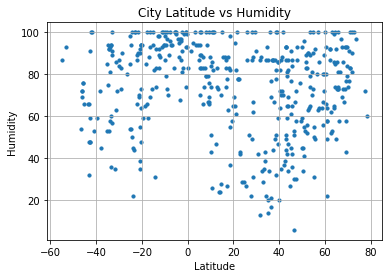

In [39]:
#Latitute vs Humidity Plot - Lat - Humidity
# Build a scatter plot for each data type
plt.scatter(resultsDataFrame["Lat"], resultsDataFrame["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("HumidityvsLaditude.png")

# Show
plt.show()

#### Latitude vs. Cloudiness Plot

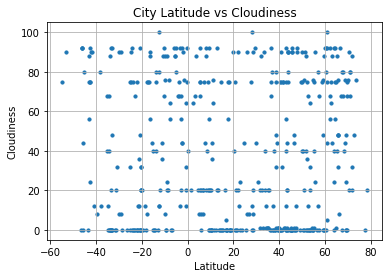

In [40]:
#Latitute vs Cloudiness Plot - Lat - Cloudiness
# Build a scatter plot for each data type
plt.scatter(resultsDataFrame["Lat"], resultsDataFrame["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("CloudinessvsLaditude.png")

# Show
plt.show()

#### Latitude vs. Wind Speed Plot

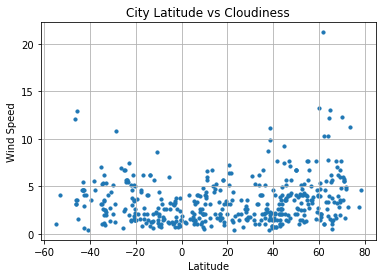

In [41]:
#Latitute vs Wind Speet Plot - Lat - Cloudiness
# Build a scatter plot for each data type
plt.scatter(resultsDataFrame["Lat"], resultsDataFrame["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("WindSpeedvsLaditude.png")

# Show
plt.show()